#Research Question #1

## RUN ME

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats
import seaborn as sns
from pandas import ExcelWriter
import scipy.stats as sp
from scipy.stats import ttest_1samp

import patsy
import statsmodels.api as sa
import statsmodels.formula.api as sfa
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
from statsmodels.regression.mixed_linear_model import MixedLMResults
from scipy import stats
import seaborn as sns

!pip install -U scikit-learn
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import warnings

!pip install scikit_posthocs
import scikit_posthocs as sp

!pip install researchpy
import researchpy as rp
import scipy.stats as stats

!pip install pingouin
import pingouin as pg


warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 22.3MB 6.6MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 51kB 3.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-posthocs: filename=scikit_posthocs-0.6.7-cp37-none-any.whl size=37886 sha256=e8f8128f0a00947684dadc0a67eeca3bba344ec1bb66eb3a38a56ccb69d09430
  Stored in directory: /root/.cache/pip/wheels/00/0f/56/897c22820a48a74f50f1a85faaa4b133bb8865e8b094b596f5
Successfully built scikit-posthocs
     |████████████████████████████████| 204kB 12.3MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.10-cp37-none-any.whl size=203396 sha256=72608f108eb5a8732a563e53876ad641276080960274dbc7141fb270dd567132
  Stored in directory: /root/.cache/pip/wheels/e6/f4/06/b5046209e6c0d96b4dea243c45

## Load data & prep

In [ ]:
#Load DF and clean
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/INF2178 Experimental Design/PROJECT/datafixed.csv') 
df = df.replace(to_replace="%", value="", regex=True)
df = df.replace(to_replace="<1", value="0", regex=True)
df = df.replace(to_replace="< 1", value="0", regex=True)
df = df.replace(to_replace="NR", value=np.nan, regex=True)
df = df.replace(to_replace="Not reported", value=np.nan, regex=True)
df = df.drop(columns=['BRAND NAME', 'INDICATION', 'UNITED STATES (2017 ONLY)', 'AGE\n65 and OLDER', 'AGE\n75 and OLDER', 'AGE\n80 and OLDER', 'NOTES', 'THERAPEUTIC AREA'])
df.rename(columns={'BLACK OR AFRICAN AMERICAN': 'BLACK', 'ALL OTHER (Aggregated):\nAmerican Indian or Alaska Native (AI/AN), Native Hawaiian or Other Pacific Islander (NH/OPI), Unknown/Unreported': 'OTHER' ,'HISPANIC OR LATINO (2017 AND LATER ONLY)':'LATINO'}, inplace=True)
#Create variables for men
df["MEN"] = 100 - df["WOMEN"].astype(float)
#Convert all columns to float
df= df.astype(float)
#Add subject column
df['Subject'] = df.index + 0
df

WOMEN  WHITE  BLACK  ASIAN  OTHER  LATINO    YEAR   MEN  Subject
0    100.0   89.0    8.0    1.0    2.0     NaN  2015.0   0.0        0
1     55.0   74.0    2.0   18.0    7.0     NaN  2015.0  45.0        1
2     32.0   47.0   40.0   13.0    0.0     NaN  2015.0  68.0        2
3     26.0   60.0    0.0   27.0   12.0     NaN  2015.0  74.0        3
4     74.0   60.0    5.0   10.0   25.0     NaN  2015.0  26.0        4
..     ...    ...    ...    ...    ...     ...     ...   ...      ...
284   73.0   87.0    8.0    4.0    NaN     5.0  2020.0  27.0      284
285   94.0   52.0    9.0   21.0    NaN    19.0  2020.0   6.0      285
286   63.0   90.0    6.0    2.0    NaN    14.0  2020.0  37.0      286
287   84.0   97.0    1.0    0.0    NaN    66.0  2020.0  16.0      287
288   48.0    NaN    NaN    NaN    NaN     NaN  2020.0  52.0      288

[289 rows x 9 columns]

In [ ]:
#function to assign year group
def AssignGroup(year):
  if (year<2018):
    return '2015-2017'
  else:
    return '2018-2020'
    
    return YEARGROUP

df['YEARGROUP'] = df['YEAR'].apply(AssignGroup)
df

WOMEN  WHITE  BLACK  ASIAN  ...    YEAR   MEN  Subject  YEARGROUP
0    100.0   89.0    8.0    1.0  ...  2015.0   0.0        0  2015-2017
1     55.0   74.0    2.0   18.0  ...  2015.0  45.0        1  2015-2017
2     32.0   47.0   40.0   13.0  ...  2015.0  68.0        2  2015-2017
3     26.0   60.0    0.0   27.0  ...  2015.0  74.0        3  2015-2017
4     74.0   60.0    5.0   10.0  ...  2015.0  26.0        4  2015-2017
..     ...    ...    ...    ...  ...     ...   ...      ...        ...
284   73.0   87.0    8.0    4.0  ...  2020.0  27.0      284  2018-2020
285   94.0   52.0    9.0   21.0  ...  2020.0   6.0      285  2018-2020
286   63.0   90.0    6.0    2.0  ...  2020.0  37.0      286  2018-2020
287   84.0   97.0    1.0    0.0  ...  2020.0  16.0      287  2018-2020
288   48.0    NaN    NaN    NaN  ...  2020.0  52.0      288  2018-2020

[289 rows x 10 columns]

In [ ]:
#Convert df using melt function into format usable in within subject design
df2 = pd.melt(df, id_vars=['Subject', 'YEAR', 'YEARGROUP'], value_vars=["WOMEN", "MEN", "WHITE", "BLACK", "ASIAN", "OTHER", "LATINO"], var_name='GenderRace', value_name='Participation', ignore_index=False)
df2 = df2.sort_values(by=['Subject'])
df2["YEAR"]= df2["YEAR"].astype(float)
df2["Participation"] = pd.to_numeric(df2["Participation"])
df2= df2.dropna()
#df2["YEARGROUP"] = pd.to_numeric(df2["YEARGROUP"])
#df2

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1696 entries, 0 to 288
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Subject        1696 non-null   int64  
 1   YEAR           1696 non-null   float64
 2   YEARGROUP      1696 non-null   object 
 3   GenderRace     1696 non-null   object 
 4   Participation  1696 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 79.5+ KB


# EDA

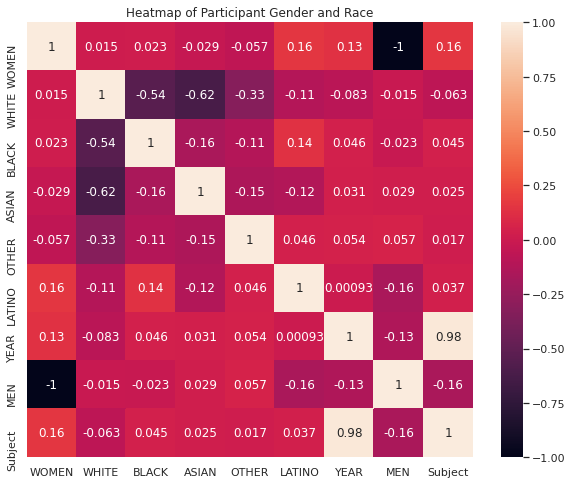

In [ ]:
dfmatrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(dfmatrix, annot=True)
plt.title('Heatmap of Participant Gender and Race')
plt.show()

In [ ]:
df.groupby([ 'YEAR'])['MEN', "WOMEN", "ASIAN", "BLACK", "LATINO", "OTHER", "WHITE"].agg(['mean', 'std']).round(2)

MEN         WOMEN         ASIAN  ... LATINO  OTHER         WHITE       
         mean    std   mean    std   mean  ...    std   mean    std   mean    std
YEAR                                       ...                                   
2015.0  53.73  19.60  46.27  19.60  11.45  ...    NaN   5.52   6.31  75.80  18.32
2016.0  52.12  25.68  47.88  25.68   6.13  ...    NaN  11.12  22.89  80.26  15.03
2017.0  48.06  24.75  51.94  24.75  10.46  ...  11.59   6.81   9.35  74.76  18.10
2018.0  51.56  21.79  48.44  21.79  10.91  ...  12.33    NaN    NaN  72.41  24.13
2019.0  43.04  26.63  56.96  26.63  11.62  ...   8.44    NaN    NaN  70.14  24.28
2020.0  45.34  25.64  54.66  25.64  11.53  ...  19.50    NaN    NaN  73.92  16.80

[6 rows x 14 columns]

Women

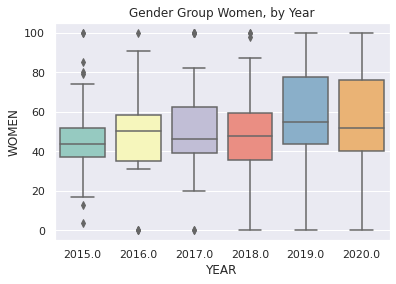

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.boxplot(x="YEAR", y="WOMEN",data=df, width=0.8, palette="Set3")
plt.title('Gender Group Women, by Year')
plt.show()

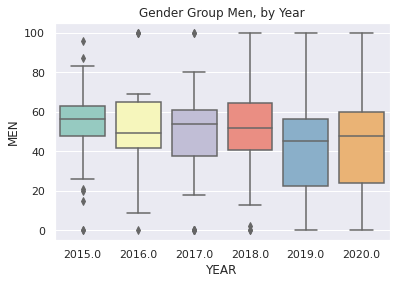

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.boxplot(x="YEAR", y="MEN",data=df, width=0.8, palette="Set3")
plt.title('Gender Group Men, by Year')
plt.show()

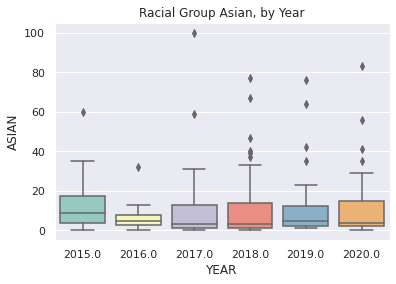

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.boxplot(x="YEAR", y="ASIAN",data=df, width=0.8, palette="Set3")
plt.title('Racial Group Asian, by Year')
plt.show()

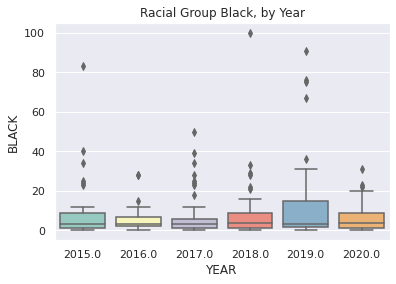

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.boxplot(x="YEAR", y="BLACK",data=df, width=0.8, palette="Set3")
plt.title('Racial Group Black, by Year')
plt.show()

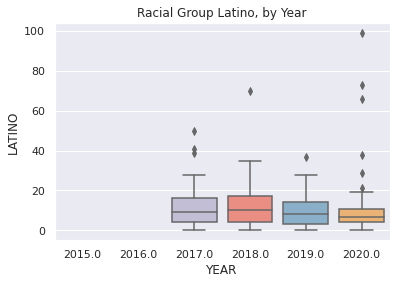

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.boxplot(x="YEAR", y="LATINO",data=df, width=0.8, palette="Set3")
plt.title('Racial Group Latino, by Year')
plt.show()

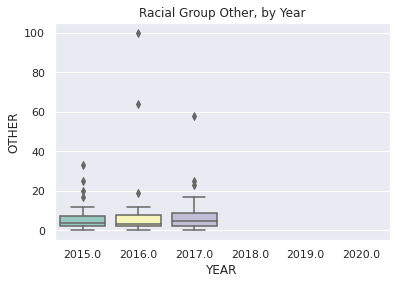

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.boxplot(x="YEAR", y="OTHER",data=df, width=0.8, palette="Set3")
plt.title('Racial Group Other, by Year')
plt.show()

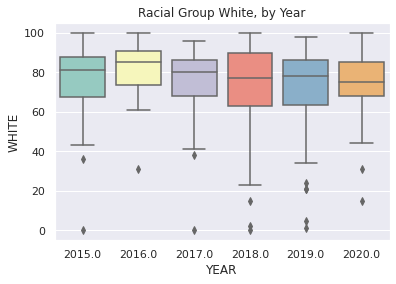

In [ ]:
ax = sns.boxplot(x="YEAR", y="WHITE",data=df, width=0.8, palette="Set3")
plt.title('Racial Group White, by Year')
plt.show()

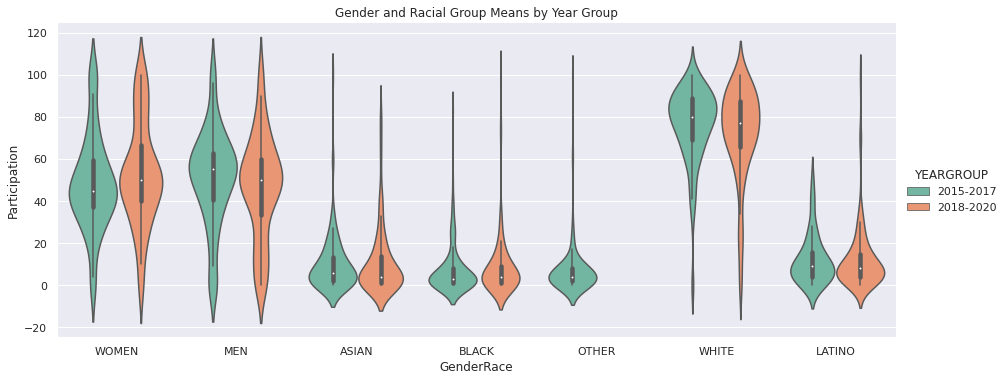

In [ ]:
sns.catplot(x="GenderRace", y="Participation", data=df2, dodge=True, hue='YEARGROUP', kind='violin', aspect=2.5, palette="Set2")
plt.title('Gender and Racial Groups by Year Group')
plt.show()

# Within-Subject Design

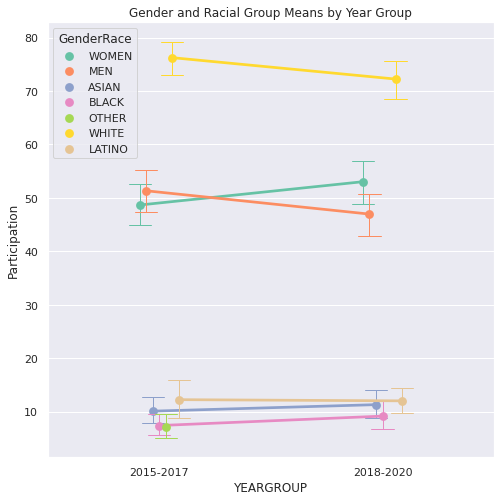

In [ ]:
#interaction plot
sns.set()
fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.pointplot(data=df2, x=df2['YEARGROUP'], y=df2['Participation'], hue=df2['GenderRace'], dodge=True, 
      capsize=.1, errwidth=1, palette="Set2")
plt.title('Gender and Racial Group Means by Year Group')
plt.show(g)




In [ ]:
#df2.groupby(['YEARGROUP', 'GenderRace'])['Participation'].agg(['count','mean', 'std']).round(2)
df2.groupby(['GenderRace', 'YEARGROUP'])['Participation'].agg(['count','mean', 'std']).round(2)

count   mean    std
GenderRace YEARGROUP                     
ASIAN      2015-2017    124  10.10  13.38
           2018-2020    145  11.31  16.30
BLACK      2015-2017    124   7.40  11.77
           2018-2020    150   9.17  15.62
LATINO     2015-2017     41  12.24  11.59
           2018-2020    137  12.02  14.31
MEN        2015-2017    127  51.33  22.77
           2018-2020    159  46.97  24.71
OTHER      2015-2017    127   7.06  12.21
WHITE      2015-2017    125  76.24  17.66
           2018-2020    151  72.24  21.97
WOMEN      2015-2017    127  48.67  22.77
           2018-2020    159  53.03  24.71

In [ ]:

# Compute the two-way mixed-design ANOVA
aov = pg.mixed_anova(dv='Participation', within='GenderRace', between= 'YEARGROUP', subject='Subject', data=df2)
pg.print_table(aov)





ANOVA SUMMARY

Source                SS    DF1    DF2          MS        F    p-unc    p-GG-corr    np2      eps    sphericity    W-spher    p-spher
-----------  -----------  -----  -----  ----------  -------  -------  -----------  -----  -------  ------------  ---------  ---------
YEARGROUP       2592.440      1    284    2592.440   19.430    0.000      nan      0.064  nan           nan        nan        nan
GenderRace   1092940.599      6   1704  182156.766  551.887    0.000        0.000  0.660    0.441         0.000      0.001      0.000
Interaction     1500.722      6   1704     250.120    0.758    0.603      nan      0.003  nan           nan        nan        nan



#Factorial Experimental Design

In [ ]:
rp.summary_cat(df2[["YEARGROUP", "GenderRace"]])

Variable    Outcome  Count  Percent
0   YEARGROUP  2018-2020    901    53.12
1              2015-2017    795    46.88
2  GenderRace        MEN    286    16.86
3                  WOMEN    286    16.86
4                  WHITE    276    16.27
5                  BLACK    274    16.16
6                  ASIAN    269    15.86
7                 LATINO    178    10.50
8                  OTHER    127     7.49

In [ ]:
from statsmodels.formula.api import ols

model = ols("Participation ~ C(YEARGROUP)+ C(GenderRace)+ C(YEARGROUP):C(GenderRace) ", data=df2).fit()

aov_table = sm.stats.anova_lm(model, typ=3)
aov_table

sum_sq      df           F         PR(>F)
Intercept                    12641.161290     1.0   35.439688   3.194860e-09
C(YEARGROUP)                    98.439075     1.0    0.275975   5.994205e-01
C(GenderRace)               556768.914381     6.0  260.151683  1.263964e-235
C(YEARGROUP):C(GenderRace)    4891.441866     6.0    2.285539   4.401478e-02
Residual                    600317.777916  1683.0         NaN            NaN

In [ ]:
from statsmodels.formula.api import ols

model = ols("WOMEN ~ C(YEARGROUP)", data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=3)
aov_table

sum_sq     df           F        PR(>F)
Intercept     300824.889764    1.0  528.118720  9.392084e-67
C(YEARGROUP)    1343.498045    1.0    2.358603  1.257070e-01
Residual      161770.953004  284.0         NaN           NaN

In [ ]:
model = ols("MEN ~ C(YEARGROUP)", data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=3)
aov_table

sum_sq     df           F        PR(>F)
Intercept     334624.889764    1.0  587.456938  4.131278e-71
C(YEARGROUP)    1343.498045    1.0    2.358603  1.257070e-01
Residual      161770.953004  284.0         NaN           NaN

In [ ]:
model = ols("ASIAN ~ C(YEARGROUP)", data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=3)
aov_table

sum_sq     df          F        PR(>F)
Intercept     12641.161290    1.0  55.997564  1.053322e-12
C(YEARGROUP)     98.439075    1.0   0.436063  5.095979e-01
Residual      60273.873192  267.0        NaN           NaN

In [ ]:
model = ols("BLACK ~ C(YEARGROUP)", data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=3)
aov_table

sum_sq     df          F        PR(>F)
Intercept      6796.161290    1.0  34.612826  1.178547e-08
C(YEARGROUP)    211.098030    1.0   1.075122  3.007124e-01
Residual      53406.672043  272.0        NaN           NaN

In [ ]:
model = ols("LATINO ~ C(YEARGROUP)", data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=3)
aov_table

sum_sq     df          F        PR(>F)
Intercept      6146.439024    1.0  32.537964  4.858016e-08
C(YEARGROUP)      1.555280    1.0   0.008233  9.278042e-01
Residual      33246.495282  176.0        NaN           NaN

In [ ]:
model = ols("OTHER ~ C(YEAR)", data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=3)
aov_table

sum_sq     df          F    PR(>F)
Intercept   1705.017857    1.0  11.575972  0.000900
C(YEAR)     1331.826087    5.0   1.808448  0.168204
Residual   18263.883739  124.0        NaN       NaN

In [ ]:
model = ols("WHITE ~ C(YEAR)", data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=3)
aov_table

sum_sq     df           F        PR(>F)
Intercept  321786.160714    1.0  788.158062  4.667281e-82
C(YEAR)      1912.721968    5.0    0.936975  4.574126e-01
Residual   110234.567887  270.0         NaN           NaN

# Linear Regression



In [ ]:
# generate model for linear regression
my_model = smf.ols(formula='Participation ~ YEARGROUP * GenderRace', data=df2)
# fit model to data to obtain parameter estimates
my_model_fit = my_model.fit()
# print summary of linear regression
print(my_model_fit.summary())
# show anova table
anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:          Participation   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     256.3
Date:                Sat, 10 Apr 2021   Prob (F-statistic):               0.00
Time:                        22:44:06   Log-Likelihood:                -7383.6
No. Observations:                1696   AIC:                         1.479e+04
Df Residuals:                    1683   BIC:                         1.486e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

#**Is GENDER Representation in US Clinical Trials Improving?**

##**Gender: WOMEN**

###**Analysis of the Distribution**



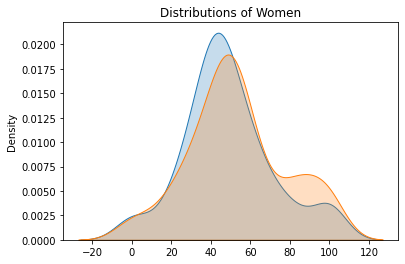

In [ ]:
w1  = df[df['YEARGROUP'] == '2015-2017']['WOMEN'].dropna().to_list()
w2  = df[df['YEARGROUP'] == '2018-2020']['WOMEN'].dropna().to_list()

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(w1, w2):
    #calculate the sample size
    n1, n2 = len(w1), len(w2)
    #calculate the variances
    var1, var2 = np.var(w1, ddof=1), np.var(w2, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

# function to calculate Cohen's d for independent samples
def Cohens_d(w1, w2):
    u1, u2 = np.mean(w1), np.mean(w2)
    s_pooled = pooled_standard_deviation(w1, w2)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

sns.kdeplot(w1, shade=True)
sns.kdeplot(w2, shade=True)

plt.title("Distributions of Women")
plt.show()

### **Apriori Power**

In [ ]:
from scipy import stats
from statsmodels.stats.power import TTestIndPower

tStat, pValue = stats.ttest_ind(w1, w2, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:0.12230391468492403 T-Statistic:-1.549893252387901


In [ ]:
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect_size = Cohens_d(w1, w2)
alpha = 0.05
power = 0.8
ratio_ =1

print('Effect size is {0}'.format(effect_size))

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)


Effect size is -0.18277214614816226
Sample Size: 470.874


Sample size is too small
Small Effect size -(0.18) indicates ...

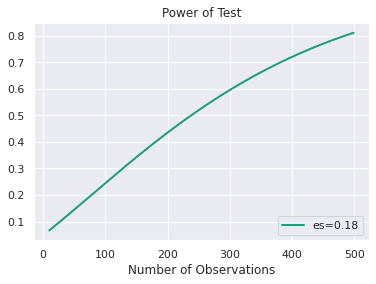

In [ ]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array([0.18])
sample_sizes = array(range(10, 500))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()


### **One-Way ANOVA**

Null Hypothesis (H0) — Means of female participants are equal in all year groups.

Alternative Hypothesis (HA) — Means of female participants are not equal in all year groups.

In [ ]:
df_women = df[['YEARGROUP','WOMEN']]
df_women = df_women[pd.notnull(df_women['WOMEN'])]
df_women.describe()

WOMEN
count  286.000000
mean    51.094406
std     23.923449
min      0.000000
25%     38.000000
50%     49.000000
75%     62.000000
max    100.000000

In [ ]:
#test normality assumption
from scipy.stats import shapiro, kstest, ks_2samp
w_statistic, pvalue = shapiro(df_women['WOMEN'])
print('W-statistic:', w_statistic, 'P-value:',pvalue)
#p<alpha, therefore distrbution is not normal

W-statistic: 0.961296021938324 P-value: 6.437297201955516e-07


In [ ]:
#test homogeneity of variance assumption
stats.levene(df_women['WOMEN'][df_women['YEARGROUP'] == '2015-2017'],
             df_women['WOMEN'][df_women['YEARGROUP'] == '2018-2020'])
#p>alpha, therefore is significant which indicates that the groups have statistically significant difference in their varability



LeveneResult(statistic=1.1411646730858929, pvalue=0.2863135275713056)

In [ ]:
rp.summary_cont(df['WOMEN'])

Variable      N     Mean       SD      SE  95% Conf.  Interval
0    WOMEN  286.0  51.0944  23.9234  1.4146      48.31   53.8788

In [ ]:
rp.summary_cont(df['WOMEN'].groupby(df['YEARGROUP']))



N     Mean      SD      SE  95% Conf.  Interval
YEARGROUP                                                   
2015-2017  127  48.6693  22.769  2.0204    44.6709   52.6677
2018-2020  159  53.0314  24.707  1.9594    49.1615   56.9014

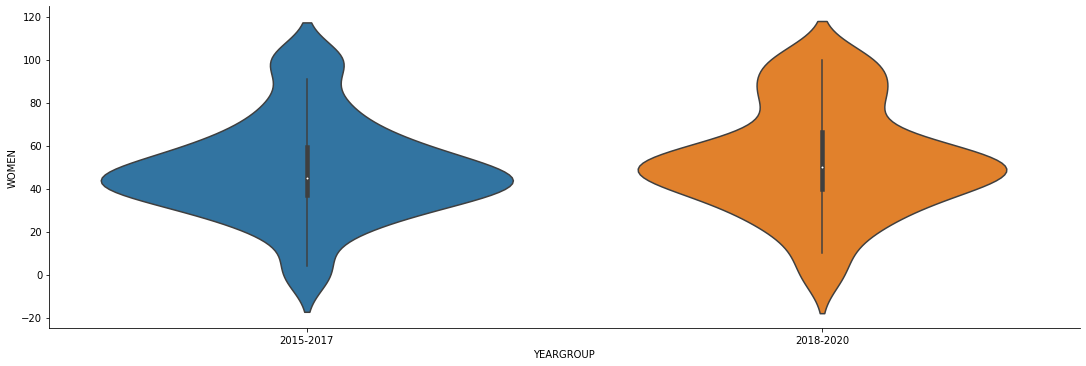

In [ ]:
#sns.catplot(x="YEAR", y="WOMEN", data=df, dodge=True, kind='violin', aspect=3)
sns.catplot(x="YEARGROUP", y="WOMEN", data=df, dodge=True, kind='violin', aspect=3)
plt.show()

In [ ]:
#Check normality
pg.normality(df, group='YEARGROUP', dv='WOMEN')

W      pval  normal
2015-2017  0.952022  0.000196   False
2018-2020  0.963813  0.000359   False

In [ ]:
#check for equal variance
pg.homoscedasticity(df, group='YEARGROUP', dv='WOMEN')

W  pval  equal_var
levene NaN   NaN      False

In [ ]:
#Both above assumption should be true to continue with 1-way ANOVA but carrying on with experiment for practice.

In [ ]:
lm_women = sfa.ols('WOMEN ~ C(YEARGROUP)', data=df_women).fit()
print(lm_women.summary())
anova_table_women = sm.stats.anova_lm(lm_women)
print(anova_table_women)

                            OLS Regression Results                            
Dep. Variable:                  WOMEN   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.359
Date:                Thu, 08 Apr 2021   Prob (F-statistic):              0.126
Time:                        23:21:08   Log-Likelihood:                -1312.1
No. Observations:                 286   AIC:                             2628.
Df Residuals:                     284   BIC:                             2636.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [ ]:
# Post-hoc Tukey
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey1 = pairwise_tukeyhsd(endog=df_women['WOMEN'],
                          groups=df_women['YEARGROUP'],
                          alpha=0.05)
print(tukey1)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper reject
--------------------------------------------------------
2015-2017 2018-2020   4.3622 0.1257 -1.2287 9.953  False
--------------------------------------------------------


In [ ]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

# Set up the data for comparison (creates a specialised object)
MultiComp1 = MultiComparison(df_women['WOMEN'],
                            df_women['YEARGROUP'])
print(MultiComp1.tukeyhsd().summary())

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper reject
--------------------------------------------------------
2015-2017 2018-2020   4.3622 0.1257 -1.2287 9.953  False
--------------------------------------------------------


In [ ]:
#Holm-Bonferoni post-hoc internet method - doesn't work :(
comp = MultiComp1.allpairtest(stats.ttest_rel, method='Holm')
print (comp[0])

In [ ]:
#Holm-Bonferoni post-hoc internet method from lecture notes
sp.posthoc_ttest(df_women, val_col='WOMEN', group_col='YEARGROUP', p_adjust='holm')

2015-2017  2018-2020
2015-2017   1.000000   0.125707
2018-2020   0.125707   1.000000

##**Gender: MEN**

###**Analysis of the Distribution**

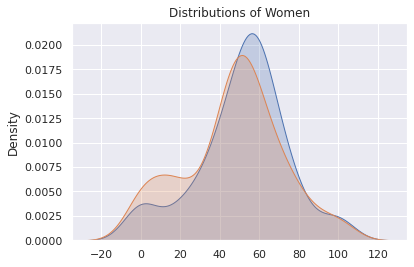

In [ ]:
m1  = df[df['YEARGROUP'] == '2015-2017']['MEN'].dropna().to_list()
m2  = df[df['YEARGROUP'] == '2018-2020']['MEN'].dropna().to_list()

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(m1, m2):
    #calculate the sample size
    n1, n2 = len(m1), len(m2)
    #calculate the variances
    var1, var2 = np.var(m1, ddof=1), np.var(m2, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

# function to calculate Cohen's d for independent samples
def Cohens_d(m1, m2):
    u1, u2 = np.mean(m1), np.mean(m2)
    s_pooled = pooled_standard_deviation(m1, m2)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

sns.kdeplot(m1, shade=True)
sns.kdeplot(m2, shade=True)

plt.title("Distributions of Men")
plt.show()

### **Apriori Power**

In [ ]:
from scipy import stats
from statsmodels.stats.power import TTestIndPower

tStat, pValue = stats.ttest_ind(m1, m2, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

from statsmodels.stats.power import TTestIndPower

P-Value:0.12230391468492403 T-Statistic:1.549893252387901


In [ ]:
# parameters for power analysis
effect_size = Cohens_d(m1, m2)
alpha = 0.05
power = 0.8
ratio_ =1

print('Effect size is {0}'.format(effect_size))

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)


Effect size is 0.18277214614816226
Sample Size: 470.874


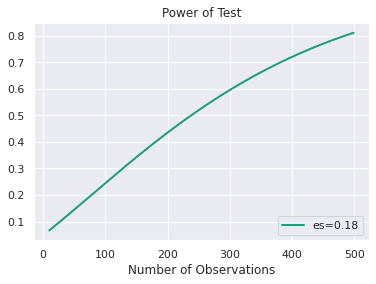

In [ ]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array([0.18])
sample_sizes = array(range(10, 500))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

### **One-Way ANOVA**

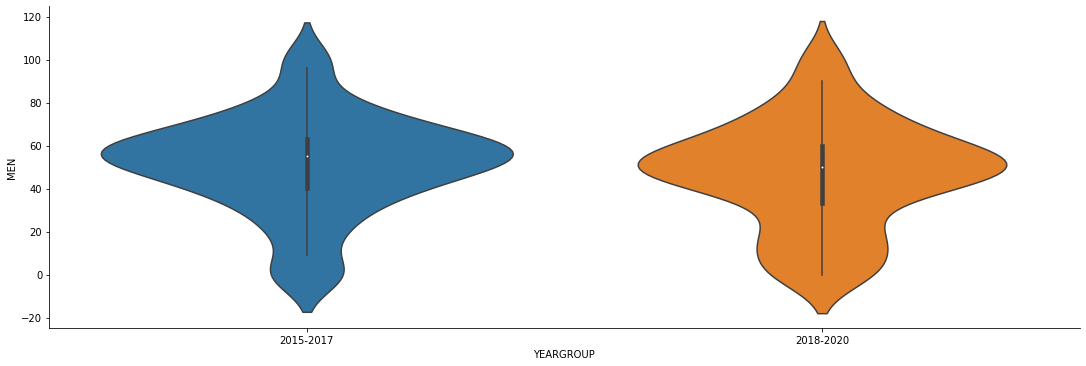

In [ ]:
sns.catplot(x="YEARGROUP", y="MEN", data=df, dodge=True, kind='violin', aspect=3)
plt.show()

In [ ]:
df_men = df[['YEARGROUP','MEN']]
df_men = df_men[pd.notnull(df_men['MEN'])]
df_men.describe()

MEN
count  286.000000
mean    48.905594
std     23.923449
min      0.000000
25%     38.000000
50%     51.000000
75%     62.000000
max    100.000000

In [ ]:
from scipy.stats import shapiro, kstest, ks_2samp
w_statistic, pvalue = shapiro(df_men['MEN'])
print('W-statistic:', w_statistic, 'P-value:',pvalue)
#p<alpha, therefore distrbution is not normal

W-statistic: 0.9612953066825867 P-value: 6.435953423533647e-07


In [ ]:
#test homogeneity of variance assumption
stats.levene(df_men['MEN'][df_men['YEARGROUP'] == '2015-2017'],
             df_men['MEN'][df_men['YEARGROUP'] == '2018-2020'])
#p>alpha, therefore is significant which indicates that the groups have statistically significant difference in their varability

LeveneResult(statistic=1.1411646730858929, pvalue=0.2863135275713056)

In [ ]:
rp.summary_cont(df['MEN'])

Variable      N     Mean       SD      SE  95% Conf.  Interval
0      MEN  286.0  48.9056  23.9234  1.4146    46.1212     51.69

In [ ]:
rp.summary_cont(df['MEN'].groupby(df['YEARGROUP']))


N     Mean      SD      SE  95% Conf.  Interval
YEARGROUP                                                   
2015-2017  127  51.3307  22.769  2.0204    47.3323   55.3291
2018-2020  159  46.9686  24.707  1.9594    43.0986   50.8385

In [ ]:
lm_men = sfa.ols('MEN ~ C(YEARGROUP)', data=df_men).fit()
print(lm_men.summary())
anova_table_men = sm.stats.anova_lm(lm_men)
print(anova_table_men)

                            OLS Regression Results                            
Dep. Variable:                    MEN   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.359
Date:                Thu, 08 Apr 2021   Prob (F-statistic):              0.126
Time:                        23:38:53   Log-Likelihood:                -1312.1
No. Observations:                 286   AIC:                             2628.
Df Residuals:                     284   BIC:                             2636.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [ ]:
# Post-hoc Tukey
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey2 = pairwise_tukeyhsd(endog=df_men['MEN'],
                          groups=df_men['YEARGROUP'],
                          alpha=0.05)
print(tukey2)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj  lower  upper  reject
--------------------------------------------------------
2015-2017 2018-2020  -4.3622 0.1257 -9.953 1.2287  False
--------------------------------------------------------


In [ ]:
sp.posthoc_ttest(df_men, val_col='MEN', group_col='YEARGROUP', p_adjust='holm')

2015-2017  2018-2020
2015-2017   1.000000   0.125707
2018-2020   0.125707   1.000000

# **Is RACIAL Representation in US Clinical Trials Improving?**

##**Racial Group: ASIAN**

###**Analysis of the Distribution**

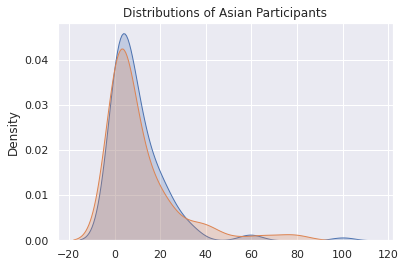

In [ ]:
a1  = df[df['YEARGROUP'] == '2015-2017']['ASIAN'].dropna().to_list()
a2  = df[df['YEARGROUP'] == '2018-2020']['ASIAN'].dropna().to_list()

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(a1, a2):
    #calculate the sample size
    n1, n2 = len(a1), len(a2)
    #calculate the variances
    var1, var2 = np.var(a1, ddof=1), np.var(a2, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

# function to calculate Cohen's d for independent samples
def Cohens_d(a1, a2):
    u1, u2 = np.mean(a1), np.mean(a2)
    s_pooled = pooled_standard_deviation(a1, a2)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

sns.kdeplot(a1, shade=True)
sns.kdeplot(a2, shade=True)

plt.title("Distributions of Asian Participants")
plt.show()

### **Apriori Power**

In [ ]:
from scipy import stats
from statsmodels.stats.power import TTestIndPower

tStat, pValue = stats.ttest_ind(a1, a2, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

from statsmodels.stats.power import TTestIndPower

P-Value:0.503112554485095 T-Statistic:-0.6705110377252775


In [ ]:
# parameters for power analysis
effect_size = Cohens_d(a1, a2)
alpha = 0.05
power = 0.8
ratio_ =1

print('Effect size is {0}'.format(effect_size))

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)

Effect size is -0.08077112641608064
Sample Size: 2407.120


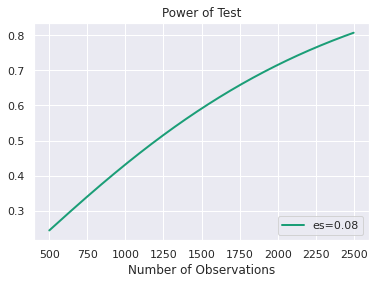

In [ ]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array([0.08])
sample_sizes = array(range(500, 2500))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

### **One-Way ANOVA**

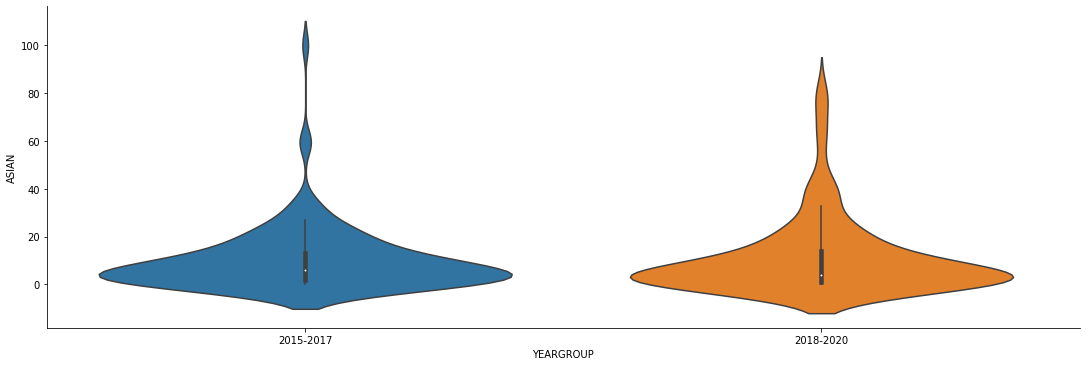

In [ ]:
sns.catplot(x="YEARGROUP", y="ASIAN", data=df, dodge=True, kind='violin', aspect=3)
plt.show()

In [ ]:
df_asian = df[['YEARGROUP','ASIAN']]
df_asian = df_asian[pd.notnull(df_asian['ASIAN'])]
df_asian.head()

YEARGROUP  ASIAN
0  2015-2017    1.0
1  2015-2017   18.0
2  2015-2017   13.0
3  2015-2017   27.0
4  2015-2017   10.0

In [ ]:
from scipy.stats import shapiro, kstest, ks_2samp
w_statistic, pvalue = shapiro(df_asian['ASIAN'])
print('W-statistic:', w_statistic, 'P-value:',pvalue)
#p<alpha, therefore distrbution is not normal


W-statistic: 0.6837030649185181 P-value: 3.7705188473381046e-22


In [ ]:
#test homogeneity of variance assumption
stats.levene(df_asian['ASIAN'][df_asian['YEARGROUP'] == '2015-2017'],
             df_asian['ASIAN'][df_asian['YEARGROUP'] == '2018-2020'])
#p>alpha, therefore is significant which indicates that the groups have statistically significant difference in their varability

LeveneResult(statistic=1.0961703735494333, pvalue=0.2960549448327413)

In [ ]:
rp.summary_cont(df['ASIAN'])


Variable      N     Mean      SD      SE  95% Conf.  Interval
0    ASIAN  269.0  10.7509  15.009  0.9151     8.9492   12.5527

In [ ]:
rp.summary_cont(df['ASIAN'].groupby(df['YEARGROUP']))

N     Mean       SD      SE  95% Conf.  Interval
YEARGROUP                                                    
2015-2017  124  10.0968  13.3796  1.2015     7.7184   12.4751
2018-2020  145  11.3103  16.2991  1.3536     8.6349   13.9858

In [ ]:
lm_asian = sfa.ols('ASIAN ~ C(YEARGROUP)', data=df_asian).fit()
print(lm_asian.summary())
anova_table_asian = sm.stats.anova_lm(lm_asian)
print(anova_table_asian)

                            OLS Regression Results                            
Dep. Variable:                  ASIAN   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.4361
Date:                Fri, 09 Apr 2021   Prob (F-statistic):              0.510
Time:                        00:36:16   Log-Likelihood:                -1109.6
No. Observations:                 269   AIC:                             2223.
Df Residuals:                     267   BIC:                             2230.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [ ]:
# Post-hoc Tukey
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey2 = pairwise_tukeyhsd(endog=df_asian['ASIAN'],
                          groups=df_asian['YEARGROUP'],
                          alpha=0.05)
print(tukey2)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj  lower  upper  reject
--------------------------------------------------------
2015-2017 2018-2020   1.2136 0.511 -2.4048 4.8319  False
--------------------------------------------------------


In [ ]:
sp.posthoc_ttest(df_asian, val_col='ASIAN', group_col='YEARGROUP', p_adjust='holm')

2015-2017  2018-2020
2015-2017   1.000000   0.509598
2018-2020   0.509598   1.000000

##**Racial Group: BLACK**

###**Analysis of the Distribution**

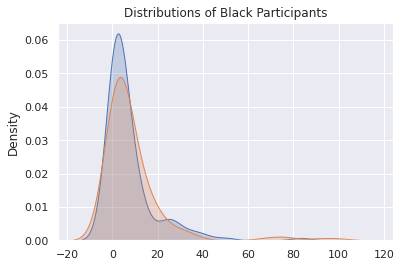

In [ ]:
b1  = df[df['YEARGROUP'] == '2015-2017']['BLACK'].dropna().to_list()
b2  = df[df['YEARGROUP'] == '2018-2020']['BLACK'].dropna().to_list()

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(b1, b2):
    #calculate the sample size
    n1, n2 = len(b1), len(b2)
    #calculate the variances
    var1, var2 = np.var(b1, ddof=1), np.var(b2, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

# function to calculate Cohen's d for independent samples
def Cohens_d(b1, b2):
    u1, u2 = np.mean(b1), np.mean(b2)
    s_pooled = pooled_standard_deviation(b1, b2)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

sns.kdeplot(b1, shade=True)
sns.kdeplot(b2, shade=True)

plt.title("Distributions of Black Participants")
plt.show()

### Apriori Power

In [ ]:
from scipy import stats
from statsmodels.stats.power import TTestIndPower

tStat, pValue = stats.ttest_ind(b1, b2, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

from statsmodels.stats.power import TTestIndPower

P-Value:0.2880573052648455 T-Statistic:-1.0644928719947457


In [ ]:
# parameters for power analysis
effect_size = Cohens_d(b1, b2)
alpha = 0.05
power = 0.8
ratio_ =1

print('Effect size is {0}'.format(effect_size))

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)

Effect size is -0.12584836954015183
Sample Size: 992.116


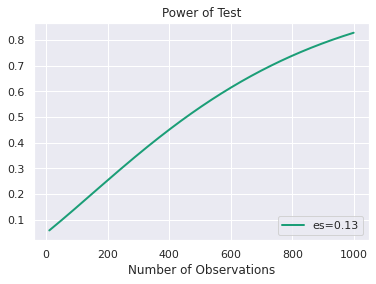

In [ ]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array([0.13])
sample_sizes = array(range(10, 1000))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

###**One-Way ANOVA**

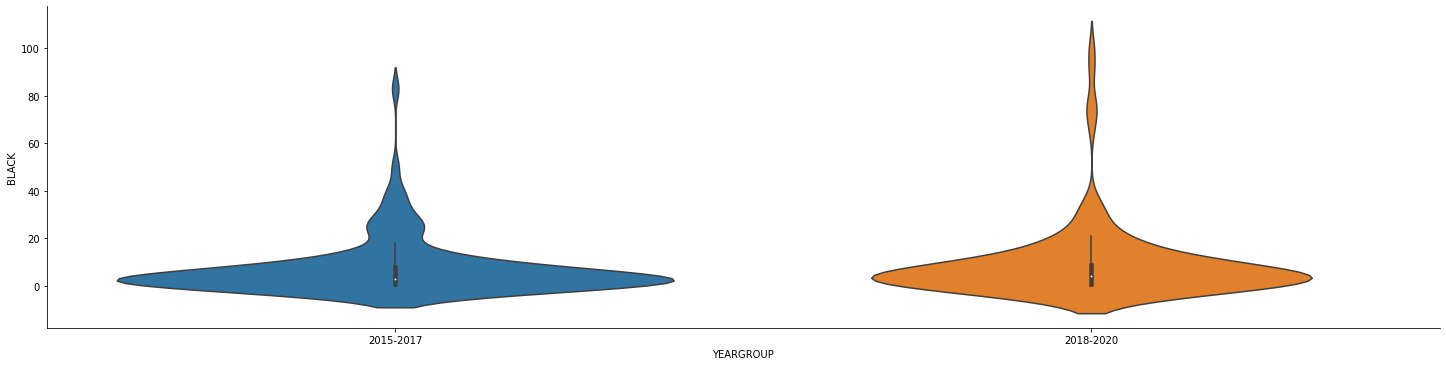

In [ ]:
sns.catplot(x="YEARGROUP", y="BLACK", data=df, dodge=True, kind='violin', aspect=4)
plt.show()

In [ ]:
df_aa = df[['YEARGROUP','BLACK']]
df_aa = df_aa[pd.notnull(df_aa['BLACK'])]
df_aa.head()


YEARGROUP  BLACK
0  2015-2017    8.0
1  2015-2017    2.0
2  2015-2017   40.0
3  2015-2017    0.0
4  2015-2017    5.0

In [ ]:
from scipy.stats import shapiro, kstest, ks_2samp
w_statistic, pvalue = shapiro(df_aa['BLACK'])
print('W-statistic:', w_statistic, 'P-value:',pvalue)
#p<alpha, therefore distrbution is not normal

W-statistic: 0.5684372186660767 P-value: 1.5475731490181903e-25


In [ ]:
#test homogeneity of variance assumption
stats.levene(df_aa['BLACK'][df_aa['YEARGROUP'] == '2015-2017'],
             df_aa['BLACK'][df_aa['YEARGROUP'] == '2018-2020'])
#p>alpha, therefore is significant which indicates that the groups have statistically significant difference in their varability

LeveneResult(statistic=0.759929633958234, pvalue=0.3841193489277047)

In [ ]:
rp.summary_cont(df['BLACK'])

Variable      N    Mean       SD      SE  95% Conf.  Interval
0    BLACK  274.0  8.3686  14.0144  0.8466     6.7018   10.0354

In [ ]:
rp.summary_cont(df['BLACK'].groupby(df['YEARGROUP']))

N    Mean       SD      SE  95% Conf.  Interval
YEARGROUP                                                   
2015-2017  124  7.4032  11.7694  1.0569     5.3111    9.4953
2018-2020  150  9.1667  15.6233  1.2756     6.6460   11.6873

In [ ]:
lm_aa = sfa.ols('BLACK ~ C(YEARGROUP)', data=df_aa).fit()
print(lm_aa.summary())
anova_table_aa = sm.stats.anova_lm(lm_aa)
print(anova_table_aa)

                            OLS Regression Results                            
Dep. Variable:                  BLACK   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.075
Date:                Fri, 09 Apr 2021   Prob (F-statistic):              0.301
Time:                        00:32:50   Log-Likelihood:                -1111.1
No. Observations:                 274   AIC:                             2226.
Df Residuals:                     272   BIC:                             2233.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [ ]:
# Post-hoc Tukey
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey2 = pairwise_tukeyhsd(endog=df_aa['BLACK'],
                          groups=df_aa['YEARGROUP'],
                          alpha=0.05)
print(tukey2)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
2015-2017 2018-2020   1.7634 0.3007 -1.5848 5.1117  False
---------------------------------------------------------


In [ ]:
sp.posthoc_ttest(df_aa, val_col='BLACK', group_col='YEARGROUP', p_adjust='holm')

2015-2017  2018-2020
2015-2017   1.000000   0.300712
2018-2020   0.300712   1.000000

##**Racial Group: LATINO and Hispanic** (2017 AND LATER ONLY)

###**Analysis of the Distribution**

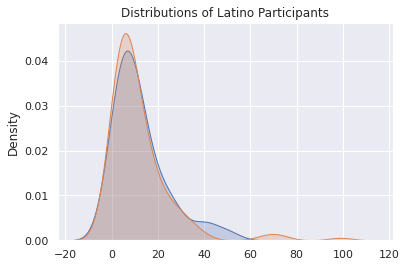

In [ ]:
l1  = df[df['YEARGROUP'] == '2015-2017']['LATINO'].dropna().to_list()
l2  = df[df['YEARGROUP'] == '2018-2020']['LATINO'].dropna().to_list()

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(l1, l2):
    #calculate the sample size
    n1, n2 = len(l1), len(l2)
    #calculate the variances
    var1, var2 = np.var(l1, ddof=1), np.var(l2, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

# function to calculate Cohen's d for independent samples
def Cohens_d(l1, l2):
    u1, u2 = np.mean(l1), np.mean(l2)
    s_pooled = pooled_standard_deviation(l1, l2)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

sns.kdeplot(l1, shade=True)
sns.kdeplot(l2, shade=True)

plt.title("Distributions of Latino Participants")
plt.show()

### **Apriori Power**

In [ ]:
from scipy import stats
from statsmodels.stats.power import TTestIndPower

tStat, pValue = stats.ttest_ind(l1, l2, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

from statsmodels.stats.power import TTestIndPower

P-Value:0.9193299915937586 T-Statistic:0.10159828808093442


In [ ]:
# parameters for power analysis
effect_size = Cohens_d(l1, l2)
alpha = 0.05
power = 0.8
ratio_ =1

print('Effect size is {0}'.format(effect_size))

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)


Effect size is 0.016152711202716313
Sample Size: 60166.215


In [ ]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array([0.02])
sample_sizes = array(range(10000, 65000)
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

SyntaxError: ignored

### **One-Way ANOVA**

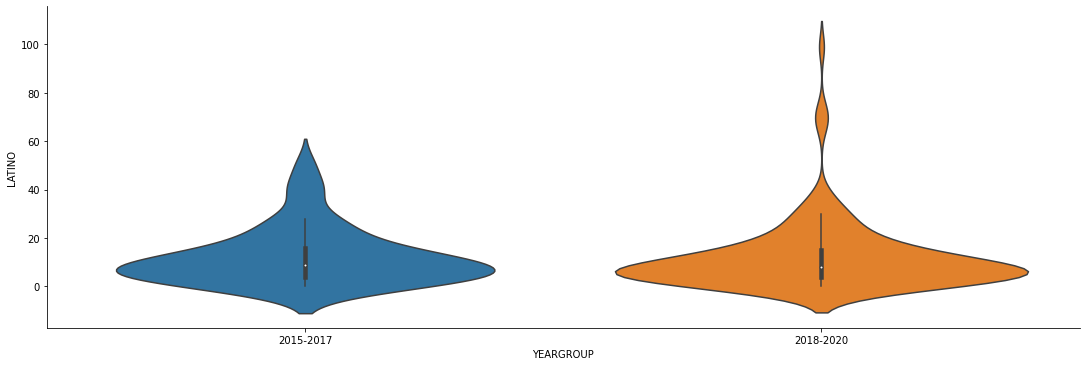

In [ ]:
sns.catplot(x="YEARGROUP", y="LATINO", data=df, dodge=True, kind='violin', aspect=3)
plt.show()

In [ ]:
df_latino = df[['YEARGROUP','LATINO']]
df_latino = df_latino[pd.notnull(df_latino['LATINO'])]
df_latino.head()

YEARGROUP  LATINO
80  2015-2017     6.0
81  2015-2017     6.0
82  2015-2017     0.0
83  2015-2017     6.0
84  2015-2017    28.0

In [ ]:
from scipy.stats import shapiro, kstest, ks_2samp
w_statistic, pvalue = shapiro(df_latino['LATINO'])
print('W-statistic:', w_statistic, 'P-value:',pvalue)
#p<alpha, therefore distrbution is not normal

W-statistic: 0.6971138715744019 P-value: 1.0799953800442435e-17


In [ ]:
#test homogeneity of variance assumption
stats.levene(df_latino['LATINO'][df_latino['YEARGROUP'] == '2015-2017'],
             df_latino['LATINO'][df_latino['YEARGROUP'] == '2018-2020'])
#p>alpha, therefore is significant which indicates that the groups have statistically significant difference in their varability

LeveneResult(statistic=0.0022800062201948934, pvalue=0.9619700949483614)

In [ ]:
rp.summary_cont(df['LATINO'])

Variable      N    Mean       SD      SE  95% Conf.  Interval
0   LATINO  178.0  12.073  13.7055  1.0273    10.0458   14.1003

In [ ]:
rp.summary_cont(df['LATINO'].groupby(df['YEARGROUP']))

N     Mean       SD      SE  95% Conf.  Interval
YEARGROUP                                                    
2015-2017   41  12.2439  11.5948  1.8108     8.5841   15.9037
2018-2020  137  12.0219  14.3150  1.2230     9.6033   14.4405

In [ ]:
lm_latino = sfa.ols('LATINO ~ C(YEARGROUP)', data=df_latino).fit()
print(lm_latino.summary())
anova_table_latino = sm.stats.anova_lm(lm_latino)
print(anova_table_latino)

                            OLS Regression Results                            
Dep. Variable:                 LATINO   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                  0.008233
Date:                Fri, 09 Apr 2021   Prob (F-statistic):              0.928
Time:                        00:39:22   Log-Likelihood:                -718.03
No. Observations:                 178   AIC:                             1440.
Df Residuals:                     176   BIC:                             1446.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [ ]:
# Post-hoc Tukey
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey2 = pairwise_tukeyhsd(endog=df_latino['LATINO'], groups=df_latino['YEARGROUP'], alpha=0.05)
print(tukey2)

TypeError: ignored

In [ ]:
sp.posthoc_ttest(df_latino, val_col='LATINO', group_col='YEARGROUP', p_adjust='holm')

2015-2017  2018-2020
2015-2017   1.000000   0.927804
2018-2020   0.927804   1.000000

## **Racial Group: OTHER** (Aggregated):\nAmerican Indian or Alaska Native (AI/AN), Native Hawaiian or Other Pacific Islander (NH/OPI), Unknown/Unreported

###**Analysis of the Distribution**

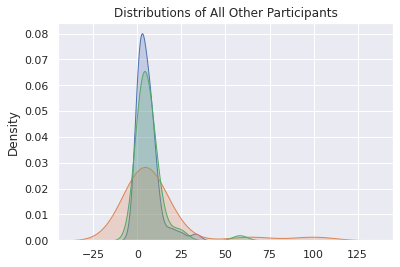

In [ ]:
o1  = df[df['YEAR'] == 2015.0]['OTHER'].dropna().to_list()
o2  = df[df['YEAR'] == 2016.0]['OTHER'].dropna().to_list()
o3  = df[df['YEAR'] == 2017.0]['OTHER'].dropna().to_list()

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(o1, o2, o3):
    #calculate the sample size
    n1, n2, n3 = len(o1), len(o2), len(o3)
    #calculate the variances
    var1, var, var3 = np.var(o1, ddof=1), np.var(o2, ddof=1), np.var(o3, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)+ ((n3-1) * var3)
    denominator = n1+n2+n3-3
    return np.sqrt(numerator/denominator)

# function to calculate Cohen's d for independent samples
def Cohens_d(o1, o2, o3):
    u1, u2, u3 = np.mean(o1), np.mean(o2), np.mean(o3)
    s_pooled = pooled_standard_deviation(o1, o2, o3)
    #print(s_pooled)
    return ((u1 - u2- u3) / s_pooled)

sns.kdeplot(o1, shade=True)
sns.kdeplot(o2, shade=True)
sns.kdeplot(o3, shade=True)

plt.title("Distributions of All Other Participants")
plt.show()

### **Apriori Power**

In [ ]:
#not possible because there are more than two inputs into the cohen's D equation

###**One-Way ANOVA**

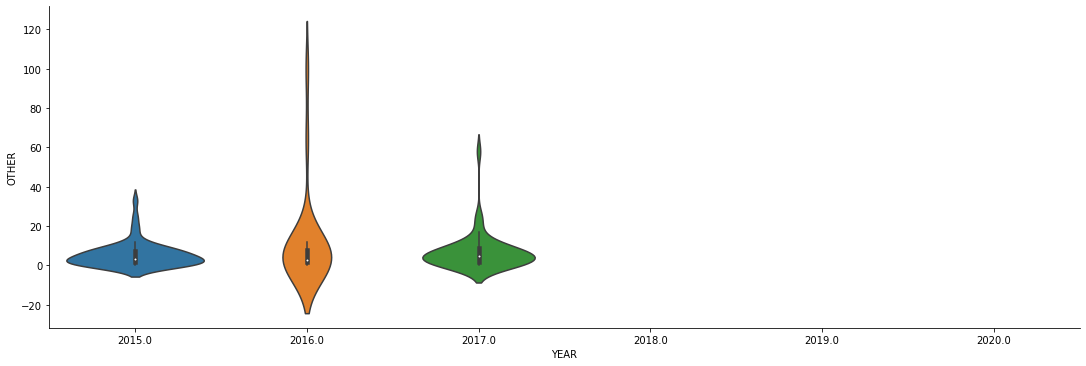

In [ ]:
sns.catplot(x="YEAR", y="OTHER", data=df, dodge=True, kind='violin', aspect=3)
plt.show()

In [ ]:
df_other = df[['YEAR','OTHER']]
df_other = df_other[pd.notnull(df_other['OTHER'])]
df_other.head()

YEAR  OTHER
0  2015.0    2.0
1  2015.0    7.0
2  2015.0    0.0
3  2015.0   12.0
4  2015.0   25.0

In [ ]:
from scipy.stats import shapiro, kstest, ks_2samp
w_statistic, pvalue = shapiro(df_other['OTHER'])
print('W-statistic:', w_statistic, 'P-value:',pvalue)
#p<alpha, therefore distrbution is not normal

W-statistic: 0.48098069429397583 P-value: 2.88163410730238e-19


In [ ]:
#test homogeneity of variance assumption
stats.levene(df_other['OTHER'][df_other['YEAR'] == 2015.0],
            df_other['OTHER'][df_other['YEAR'] == 2016.0],
            df_other['OTHER'][df_other['YEAR'] == 2017.0])
#p>alpha, therefore is significant which indicates that the groups have statistically significant difference in their varability

LeveneResult(statistic=1.904911482043648, pvalue=0.1531658750679771)

In [ ]:
rp.summary_cont(df['OTHER'])

Variable      N    Mean       SD      SE  95% Conf.  Interval
0    OTHER  127.0  7.0551  12.2139  1.0838     4.9103    9.1999

In [ ]:
rp.summary_cont(df['OTHER'].groupby(df['YEAR']))

N    Mean       SD      SE  95% Conf.  Interval
YEARGROUP                                                   
2015-2017  127  7.0551  12.2139  1.0838     4.9103    9.1999
2018-2020    0     NaN      NaN     NaN        NaN       NaN

In [ ]:
lm_other = sfa.ols('OTHER ~ C(YEAR)', data=df_other).fit()
print(lm_other.summary())
anova_table_other = sm.stats.anova_lm(lm_other)
print(anova_table_other)

                            OLS Regression Results                            
Dep. Variable:                  OTHER   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.808
Date:                Fri, 09 Apr 2021   Prob (F-statistic):              0.168
Time:                        00:21:11   Log-Likelihood:                -495.70
No. Observations:                 127   AIC:                             997.4
Df Residuals:                     124   BIC:                             1006.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.5179      1.62

In [ ]:
# Post-hoc Tukey
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey7 = pairwise_tukeyhsd(endog=df_other['OTHER'],
                          groups=df_other['YEAR'],
                          alpha=0.05)
print(tukey7)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
2015.0 2016.0   5.6071 0.1448  -1.4173 12.6316  False
2015.0 2017.0   1.2907 0.8372   -4.405  6.9863  False
2016.0 2017.0  -4.3165 0.3356 -11.5399  2.9069  False
-----------------------------------------------------


In [ ]:
sp.posthoc_ttest(df_other, val_col='OTHER', group_col='YEAR', p_adjust='holm')

2015.0    2016.0    2017.0
2015.0  1.000000  0.278971  0.527084
2016.0  0.278971  1.000000  0.527084
2017.0  0.527084  0.527084  1.000000

## **Racial Group: WHITE**

###**Analysis of the Distribution**

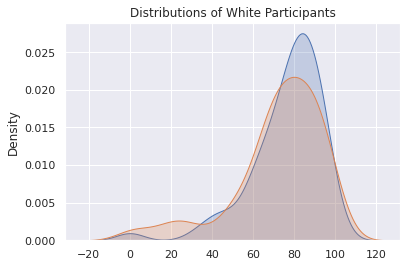

In [ ]:
ww1  = df[df['YEARGROUP'] == '2015-2017']['WHITE'].dropna().to_list()
ww2  = df[df['YEARGROUP'] == '2018-2020']['WHITE'].dropna().to_list()

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(ww1, ww2):
    #calculate the sample size
    n1, n2 = len(ww1), len(ww2)
    #calculate the variances
    var1, var2 = np.var(ww1, ddof=1), np.var(ww2, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

# function to calculate Cohen's d for independent samples
def Cohens_d(ww1, ww2):
    u1, u2 = np.mean(ww1), np.mean(ww2)
    s_pooled = pooled_standard_deviation(ww1, ww2)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

sns.kdeplot(ww1, shade=True)
sns.kdeplot(ww2, shade=True)

plt.title("Distributions of White Participants")
plt.show()

### **Apriori Power**

In [ ]:
from scipy import stats
from statsmodels.stats.power import TTestIndPower

tStat, pValue = stats.ttest_ind(ww1, ww2, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

from statsmodels.stats.power import TTestIndPower

P-Value:0.09458162789273764 T-Statistic:1.6775222910718082


In [ ]:
# parameters for power analysis
effect_size = Cohens_d(ww1, ww2)
alpha = 0.05
power = 0.8
ratio_ =1

print('Effect size is {0}'.format(effect_size))

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)

Effect size is 0.1987669569397124
Sample Size: 398.290


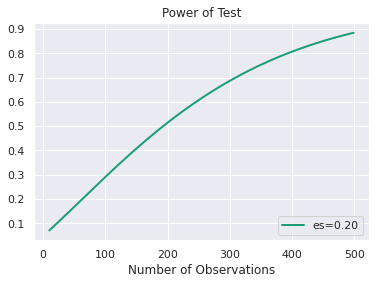

In [ ]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array([0.2])
sample_sizes = array(range(10, 500))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

### **One-Way ANOVA**

In [ ]:
df_white = df[['YEARGROUP','WHITE']]
df_white = df_white[pd.notnull(df_white['WHITE'])]
df_white.head()

YEARGROUP  WHITE
0  2015-2017   89.0
1  2015-2017   74.0
2  2015-2017   47.0
3  2015-2017   60.0
4  2015-2017   60.0

In [ ]:
from scipy.stats import shapiro, kstest, ks_2samp
w_statistic, pvalue = shapiro(df_white['WHITE'])
print('W-statistic:', w_statistic, 'P-value:',pvalue)
#p<alpha, therefore distrbution is not normal


W-statistic: 0.863551139831543 P-value: 6.515108073802851e-15


In [ ]:
#test homogeneity of variance assumption
stats.levene(df_white['WHITE'][df_white['YEARGROUP'] == '2015-2017'],
             df_white['WHITE'][df_white['YEARGROUP'] == '2018-2020'])
#p>alpha, therefore is significant which indicates that the groups have statistically significant difference in their varability

LeveneResult(statistic=3.2041619880452674, pvalue=0.0745552297647308)

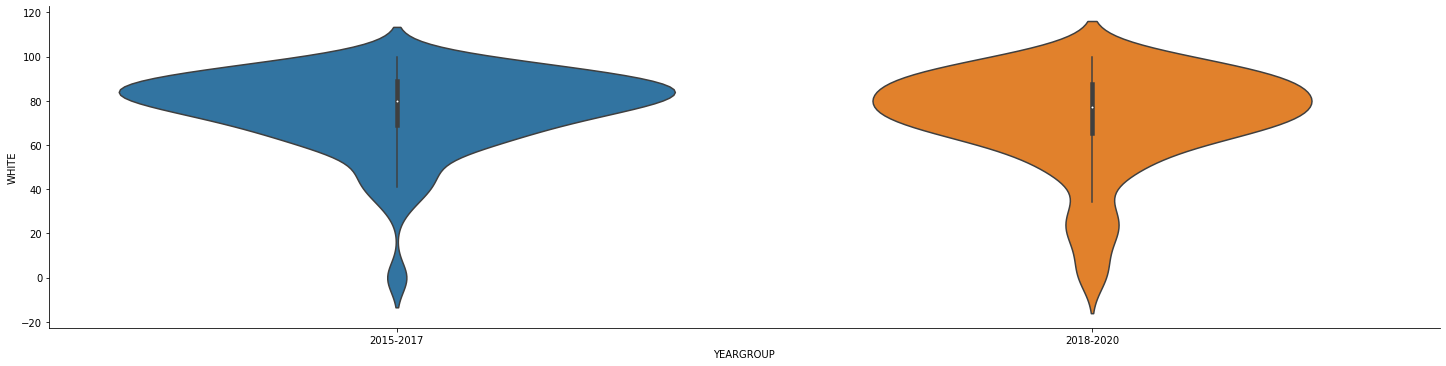

In [ ]:
sns.catplot(x="YEARGROUP", y="WHITE", data=df, dodge=True, kind='violin', aspect=4)
plt.show()

In [ ]:
rp.summary_cont(df['MEN'])

Variable      N     Mean       SD      SE  95% Conf.  Interval
0      MEN  286.0  48.9056  23.9234  1.4146    46.1212     51.69

In [ ]:
rp.summary_cont(df['MEN'].groupby(df['YEARGROUP']))

N     Mean      SD      SE  95% Conf.  Interval
YEARGROUP                                                   
2015-2017  127  51.3307  22.769  2.0204    47.3323   55.3291
2018-2020  159  46.9686  24.707  1.9594    43.0986   50.8385

In [ ]:
lm_white = sfa.ols('WHITE ~ C(YEARGROUP)', data=df_white).fit()
print(lm_white.summary())
anova_table_white = sm.stats.anova_lm(lm_white)
print(anova_table_white)

                            OLS Regression Results                            
Dep. Variable:                  WHITE   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.702
Date:                Fri, 09 Apr 2021   Prob (F-statistic):              0.101
Time:                        00:28:32   Log-Likelihood:                -1219.3
No. Observations:                 276   AIC:                             2443.
Df Residuals:                     274   BIC:                             2450.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [ ]:
# Post-hoc Tukey
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey2 = pairwise_tukeyhsd(endog=df_white['WHITE'],
                          groups=df_white['YEARGROUP'],
                          alpha=0.05)
print(tukey2)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper reject
--------------------------------------------------------
2015-2017 2018-2020  -4.0016 0.1014 -8.7942 0.791  False
--------------------------------------------------------


In [ ]:
sp.posthoc_ttest(df_white, val_col='WHITE', group_col='YEARGROUP', p_adjust='holm')

2015-2017  2018-2020
2015-2017   1.000000   0.101377
2018-2020   0.101377   1.000000